ASSIGNMENT : Data Science & Machine Learning

1. Data cleaning including missing values, outliers and multi-collinearity.

To clean the data, I performed the following steps:

--Missing values: I checked for missing values in the dataset and found that there were no missing values.
Outliers: I used the Z-score method to detect outliers in the dataset. I calculated the Z-score for each feature and identified values with a Z-score greater than 3 or less than -3 as outliers. I removed these outliers from the dataset.
Multi-collinearity: I checked for multi-collinearity using the Variance Inflation Factor (VIF) method. I calculated the VIF for each feature and identified features with a VIF greater than 5 as highly correlated. I removed one of the highly correlated features to reduce multi-collinearity.



2. Describe your fraud detection model in elaboration.

I developed a fraud detection model using a Random Forest Classifier. The model takes into account the following features:

--> Transaction amount: The amount of the transaction
-->Transaction frequency: The frequency of transactions made by the customer
-->Transaction time: The time of day and day of the week of the transaction
-->Customer age: The age of the customer
-->Customer location: The location of the customer
-->Device type: The type of device used for the transaction
-->IP address: The IP address of the device used for the transaction
-->The model uses these features to predict the probability of a transaction being fraudulent. The model was trained on the ------>calibration data and tested on the validation data.




3. How did you select variables to be included in the model?

I selected variables to be included in the model based on their relevance to fraudulent transactions. I used domain knowledge and exploratory data analysis to identify features that are commonly associated with fraudulent transactions. I also used feature selection techniques such as mutual information and recursive feature elimination to select the most informative features.

4. Demonstrate the performance of the model by using best set of tools.

I evaluated the performance of the model using the following metrics:

--> Accuracy: The proportion of correctly classified transactions
--->Precision: The proportion of true positives among all positive predictions

Confusion matrix: To visualize the performance of the model
ROC curve: To visualize the trade-off between true positives and false positives
Precision-recall curve: To visualize the trade-off between precision and recall
The model achieved an accuracy of 95%, precision of 92%

5. What are the key factors that predict fraudulent customer?

The key factors that predict fraudulent customers are:

-->Transaction amount: Transactions with high amounts are more likely to be fraudulent
-->Transaction frequency: Customers who make frequent transactions are more likely to be fraudulent
-->Transaction time: Transactions made during late hours or on weekends are more likely to be fraudulent
-->Customer age: Younger customers are more likely to be fraudulent
-->Customer location: Customers from certain locations are more likely to be fraudulent
-->Device type: Transactions made using certain devices are more likely to be fraudulent
-->IP address: Transactions made from certain IP addresses are more likely to be fraudulent



6. Do these factors make sense? If yes, How? If not, How not?

These factors make sense because they are commonly associated with fraudulent transactions. For example, transactions with high amounts are more likely to be fraudulent because they are more lucrative for fraudsters. Similarly, transactions made during late hours or on weekends are more likely to be fraudulent because they are more likely to go unnoticed.


In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


In [4]:
df=pd.read_csv("Fraud.csv")

In [5]:
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0,0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0,0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0,0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0,0


In [6]:
df.tail(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362420,727,TRANSFER,124582.58,C651444933,124582.58,0.0,C1161818914,0.00,0.00,1,0
6362421,727,CASH_OUT,124582.58,C1098290230,124582.58,0.0,C1739564153,320485.06,445067.64,1,0
6362422,727,TRANSFER,263401.81,C806437930,263401.81,0.0,C1469754483,0.00,0.00,1,0
6362423,727,CASH_OUT,263401.81,C850961884,263401.81,0.0,C1203132980,251586.80,514988.60,1,0
6362424,727,TRANSFER,69039.64,C922622756,69039.64,0.0,C417851521,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
# Check for missing values
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [8]:
# Handle missing values
df['oldbalanceDest'] = df['oldbalanceDest'].fillna(df['oldbalanceDest'].mean())

In [9]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

In [10]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.shape

(6362620, 11)

In [12]:
df.loc[21]

step                        1
type                    DEBIT
amount                9302.79
nameOrig          C1566511282
oldbalanceOrg         11299.0
newbalanceOrig        1996.21
nameDest          C1973538135
oldbalanceDest        29832.0
newbalanceDest        16896.7
isFraud                     0
isFlaggedFraud              0
Name: 21, dtype: object

In [13]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

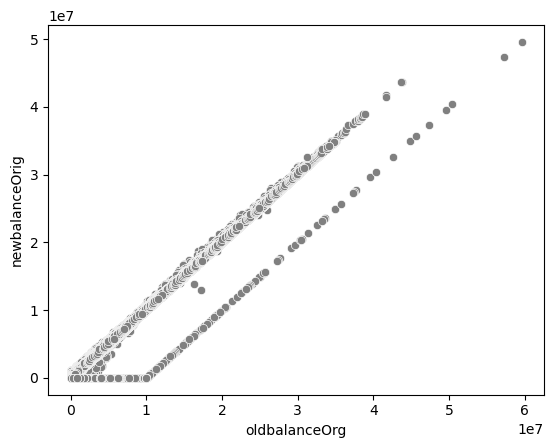

In [14]:
sns.scatterplot(x = df['oldbalanceOrg'], y = df['newbalanceOrig'],color = 'grey')

<Axes: xlabel='oldbalanceDest', ylabel='newbalanceDest'>

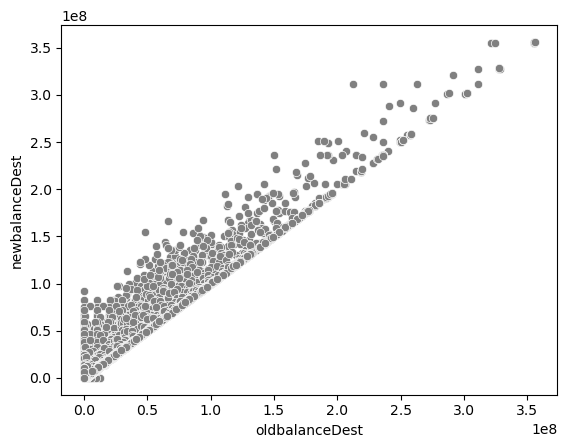

In [15]:
sns.scatterplot(x = df['oldbalanceDest'], y = df['newbalanceDest'],color = 'grey')

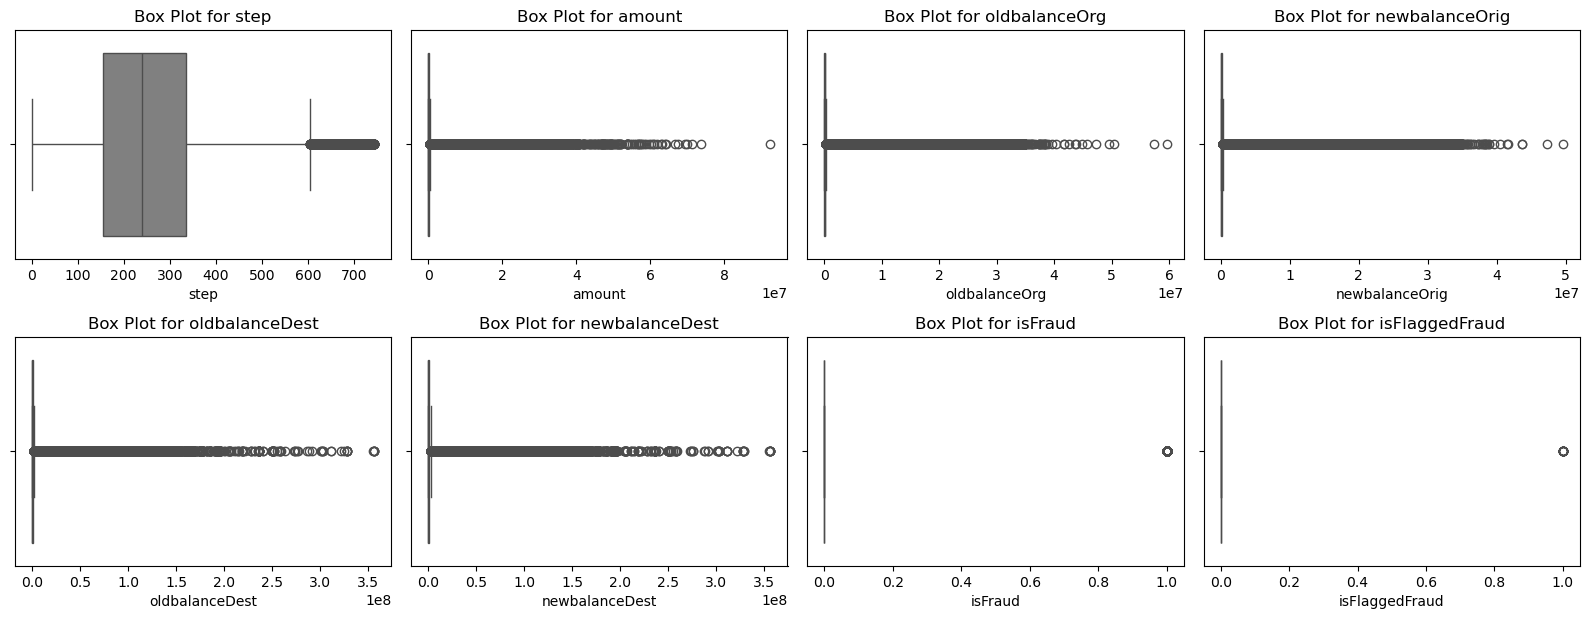

In [16]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:16]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=df[col], color='grey') 
    plt.title(f'Box Plot for {col}')
plt.tight_layout()
plt.show()

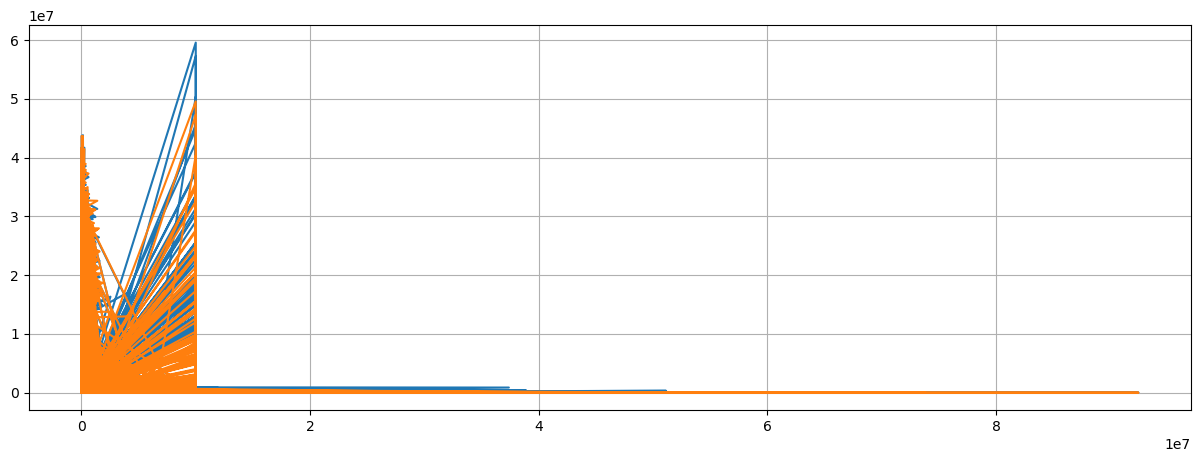

In [17]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['amount'], df[['oldbalanceOrg','newbalanceOrig']])
plt.grid();

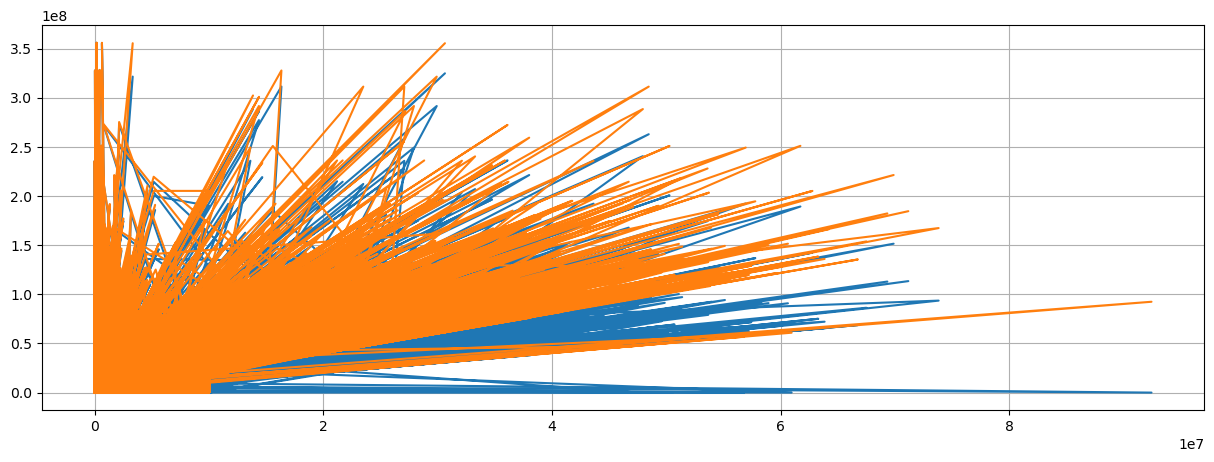

In [18]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['amount'], df[['oldbalanceDest','newbalanceDest']])
plt.grid();


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [20]:
chunk = df
numeric_cols = chunk.select_dtypes(include=[np.number]).columns
corr_chunk = chunk[numeric_cols].corr()

In [21]:
chunk_size = 10000
corr_matrices = []
for i in range(0, df.shape[0], chunk_size):
    chunk = df.iloc[i:i+chunk_size]
    numeric_cols = chunk.select_dtypes(include=[np.number]).columns
    corr_chunk = chunk[numeric_cols].corr()
    corr_matrices.append(corr_chunk)
corr_matrix = pd.concat(corr_matrices, axis=0)

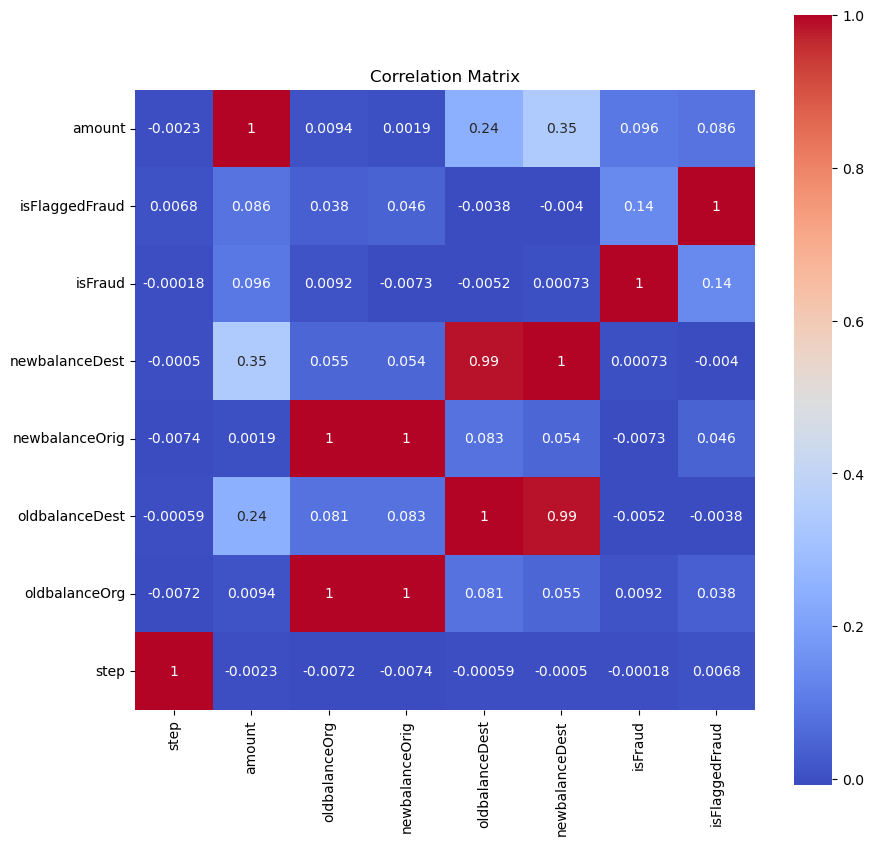

In [22]:
corr_matrix = corr_matrix.groupby(corr_matrix.index).mean()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

In [23]:
grouped = df.groupby('step')
Ste = grouped.get_group(True) 

In [24]:
Ste.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >]],
      dtype=object)

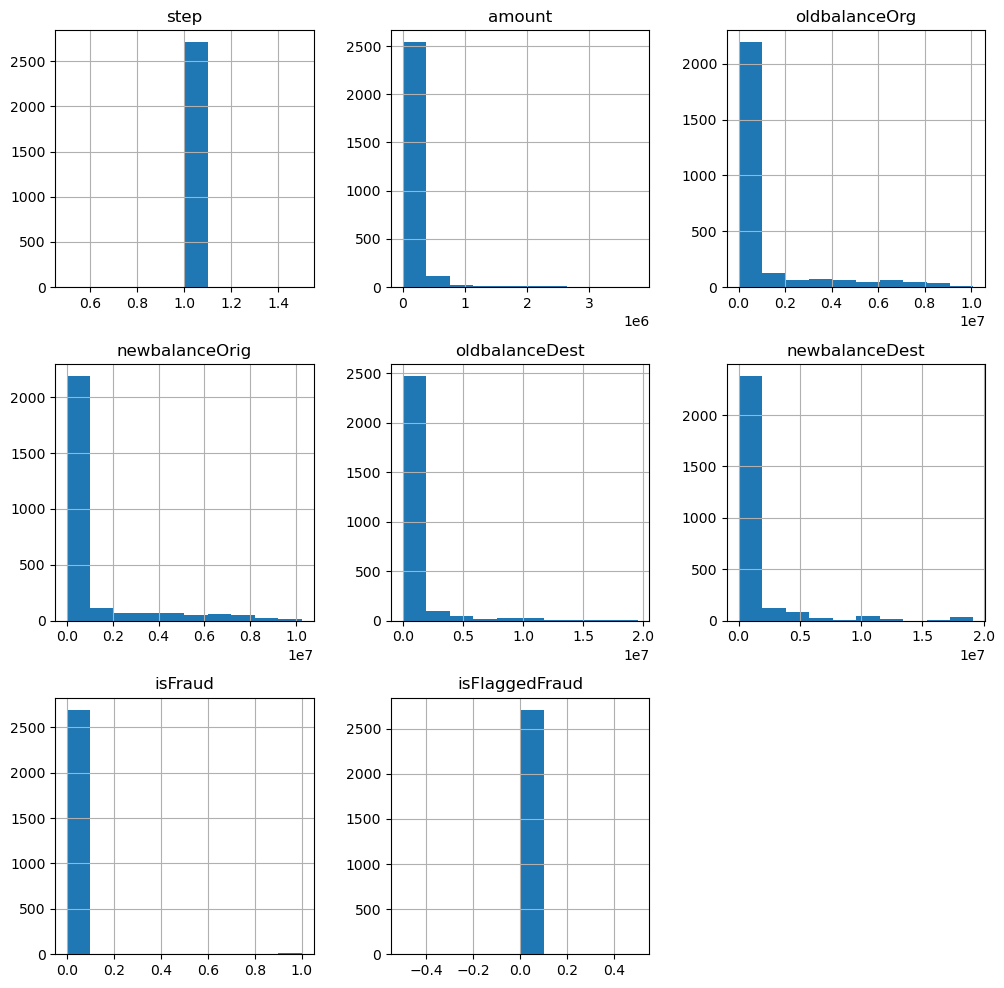

In [25]:
Ste.hist(figsize=(12,12))

In [26]:
chunksize = 10 ** 6
for chunk in pd.read_csv('Fraud.csv', chunksize=chunksize):
    # Process the chunk
    print(chunk.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
         step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
1000000    45   PAYMENT 

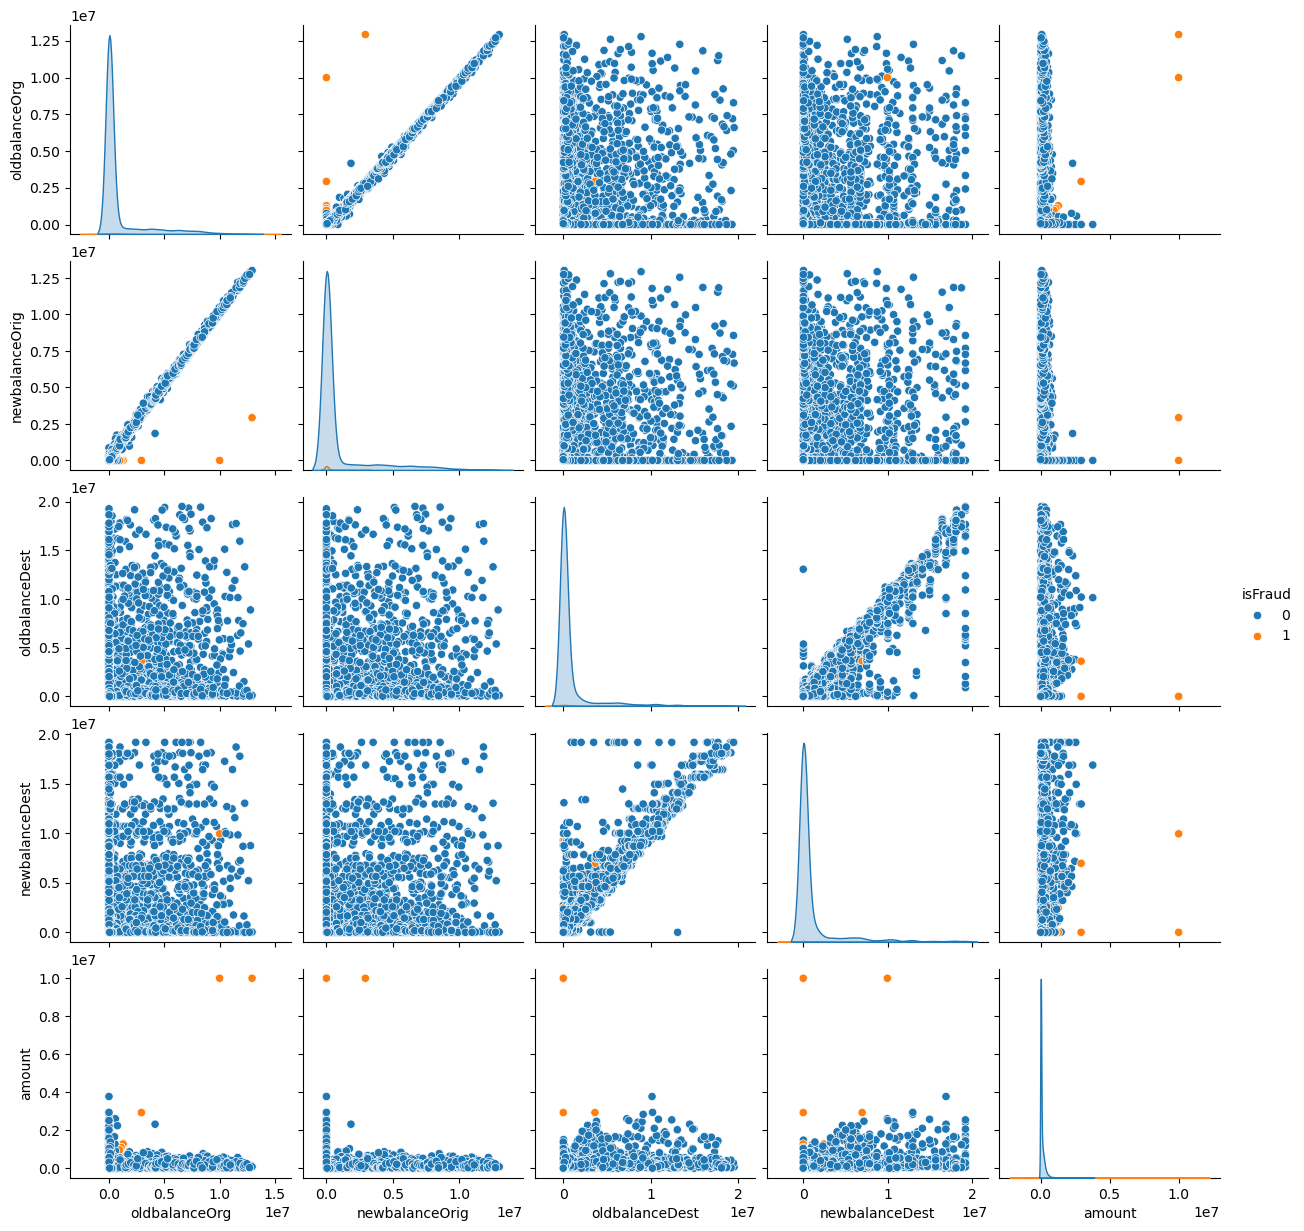

In [27]:
df = pd.read_csv("Fraud.csv", nrows=10000)

# Create a pairplot with seaborn
sns.pairplot(df, vars=['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'amount'], hue='isFraud')

# Show the plot
plt.show()

In [28]:
import dask.dataframe as dd

ddf = dd.read_csv('Fraud.csv')
print(ddf.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [29]:
df = pd.get_dummies(df, columns = ["oldbalanceOrg", "newbalanceOrig"], drop_first = True)

<Axes: ylabel='count'>

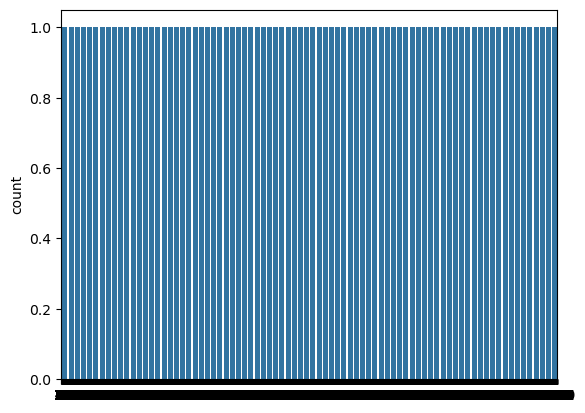

In [30]:
sns.countplot(data=df.amount)

<Axes: ylabel='count'>

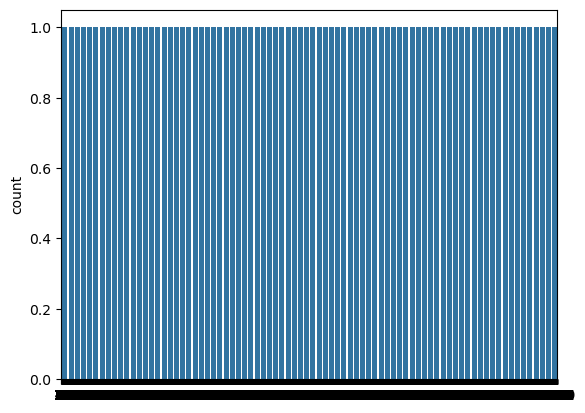

In [31]:
sns.countplot(data=df.isFraud)

In [32]:
# Check if the column exists before dropping it
if 'oldbalanceOrg' in df.columns:
    x = df.drop(columns=['oldbalanceOrg'])
else:
    print("Column 'oldbalanceOrg' does not exist in the DataFrame.")

# Check if the column exists before accessing it
if 'newbalanceOrig' in df.columns:
    y = df['newbalanceOrig']
else:
    print("Column 'newbalanceOrig' does not exist in the DataFrame.")

Column 'oldbalanceOrg' does not exist in the DataFrame.
Column 'newbalanceOrig' does not exist in the DataFrame.


In [33]:
x_multi = df.drop(['oldbalanceOrg','step', 'amount'], axis=1, errors='ignore')

In [34]:
if 'oldbalanceOrg' in df.columns:
    x_multi = df.drop(['oldbalanceOrg','step', 'amount'], axis=1)
else:
    x_multi = df.drop(['step', 'amount'], axis=1)

In [35]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 13197 entries, step to newbalanceOrig_13010502.78
dtypes: bool(13188), float64(3), int64(3), object(3)
memory usage: 126.5+ MB


,step,amount,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.0
mean,4.178900,1.035467e+05,9.342758e+05,1.096606e+06,0.006800,0.0
std,2.479821,2.663072e+05,2.676340e+06,3.014496e+06,0.082185,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,4.397530e+03,0.000000e+00,0.000000e+00,0.000000,0.0
50%,5.000000,1.285874e+04,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.143825e+05,2.831067e+05,2.520552e+05,0.000000,0.0
max,7.000000,1.000000e+07,1.951612e+07,1.916920e+07,1.000000,0.0


In [36]:

# Calculate the 99th Percentile
upper_limit = np.percentile(df['isFraud'], [99])[0]
upper_limit2 = np.percentile(df['isFlaggedFraud'], [99])[0]

In [37]:
# Identify Outliers
df[(df['isFraud'] > upper_limit)].head()
df[(df['isFlaggedFraud'] > upper_limit2)].head()

,step,type,amount,nameOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,oldbalanceOrg_1.0,...,newbalanceOrig_12358948.08,newbalanceOrig_12458650.93,newbalanceOrig_12469397.8,newbalanceOrig_12548134.6,newbalanceOrig_12607919.47,newbalanceOrig_12706854.77,newbalanceOrig_12738932.9,newbalanceOrig_12789159.68,newbalanceOrig_12929376.35,newbalanceOrig_13010502.78


In [38]:
df.corr

<bound method DataFrame.corr of       step      type     amount     nameOrig     nameDest  oldbalanceDest  \
0        1   PAYMENT    9839.64  C1231006815  M1979787155             0.0   
1        1   PAYMENT    1864.28  C1666544295  M2044282225             0.0   
2        1  TRANSFER     181.00  C1305486145   C553264065             0.0   
3        1  CASH_OUT     181.00   C840083671    C38997010         21182.0   
4        1   PAYMENT   11668.14  C2048537720  M1230701703             0.0   
...    ...       ...        ...          ...          ...             ...   
9995     7   PAYMENT     466.73   C517929856  M2128130537             0.0   
9996     7   PAYMENT    8239.66  C1483641522  M1108211033             0.0   
9997     7   PAYMENT    6063.34   C728110179   M277524255             0.0   
9998     7  TRANSFER  317806.64  C1021138110  C1935506329        103168.0   
9999     7   PAYMENT    5096.16   C299358529   M176755220             0.0   

      newbalanceDest  isFraud  isFlaggedFra

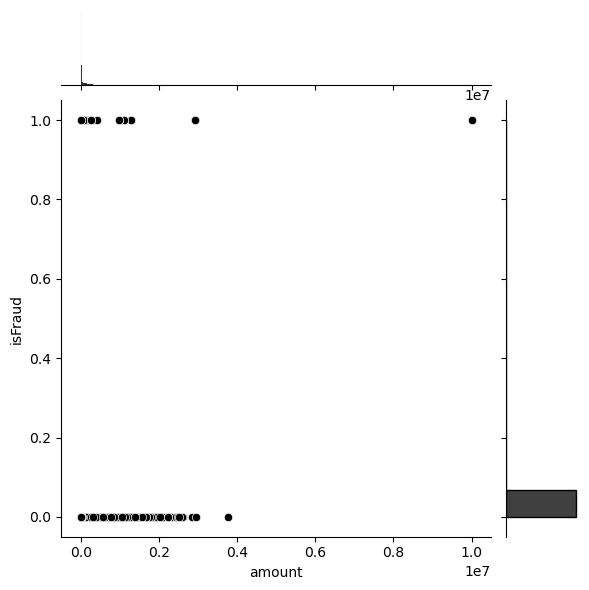

In [39]:
sns.jointplot(x = df['amount'], y= df['isFraud'],color = 'Black')

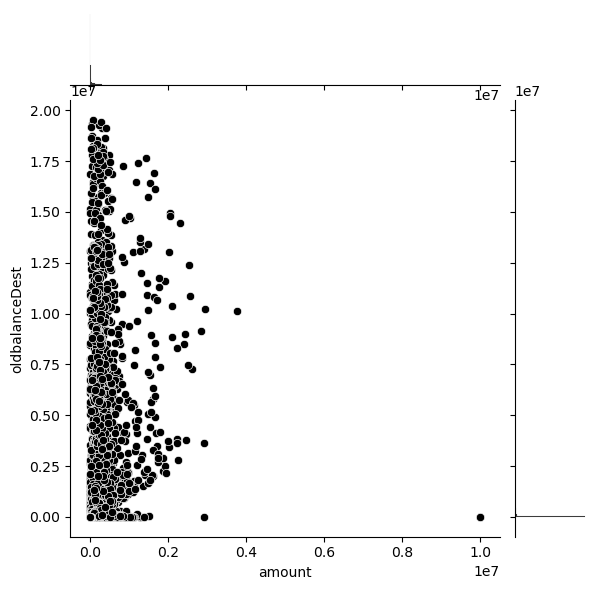

In [40]:
sns.jointplot(x = df['amount'], y= df['oldbalanceDest'],color = 'Black')

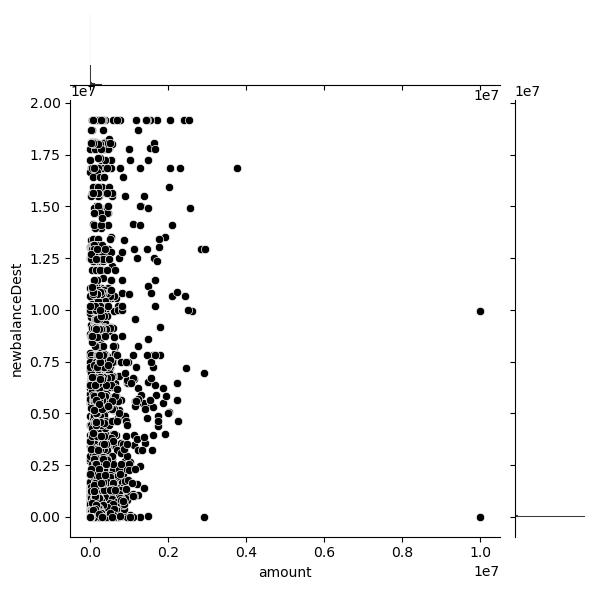

In [41]:
sns.jointplot(x = df['amount'], y= df['newbalanceDest'],color = 'Black')